# Week 10: Bootstrapping, Confidence intervals

In [1]:
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Goal:** estimate an unknown parameter where, a parameter is a numerical value associated with a population. This could be anything from trying to answer the question of what is the true mean height of people going to UC Berkeley, or what is the median home price in SF? To answer these questions we usually start off with a representative random sample. From here we can get an estimate of true parameter using the random sample. **Even though we have the estimate how do we know how good our estimate is???**

We could just go out and get another bunch of random samples or increase the sample size, but this is often infeasible as the cost is a lot! That is why we really on small representative random samples as they are often incredibly accurate and inexpensive. But our questions still remains, how good is our estimate and how much could it vary based on the random sample we got. We could've gotten a completely random sample and then another estimate so how much do these estimates change?

#### Bootstrapping is our savior!

To avoid redoing a random sample, we treat the random sample we got at the true population. This is feasible as a random sample is representative of the true population. The trick is that we take a bunch of random samples with replacement from the original random sample and recalculate the parameter we were trying to estimate for each of the new random samples. We do not have to go out and get a new random sample, we can simply randomly sample the sample we already have we does not cost us anything! 

The steps are as follows (textbook):

* **Treat the original sample as if it were the population.**

* **Draw from the sample, at random with replacement, the same number of times as the original sample size.**



**What is with replacement versus without and why do we bootstrap using with replacement?**

#### Example with Cereal

Say we wanted to know what percentage of people at UC Berkeley ate Honey Nut Cheerios for breakfast? For this example we will be using dummy data and for the sake of learning we already know the true percentage which is gonna be 20% or 1/5. We are assuming there are only 5 cereals in total, "Wheaties", "Apple Jacks", "Lucky Charms", "Honey Nut Cheerios", "Fruity Pebbles", and that people eat only one cereal. So in this hypothetical situation I randomly survey 100 people at UC Berkeley and gather what there favorite cereal was. The datadet is called `favorite_cereal`.

In [31]:
np.random.seed(43)

top_5 = make_array("Wheaties", "Apple Jacks", "Lucky Charms", "Honey Nut Cheerios", "Fruity Pebbles")
cereals = np.random.choice(top_5, 100)
favorite_cereal = Table().with_column("cereal", cereals)
favorite_cereal.show(5)

cereal
Fruity Pebbles
Wheaties
Apple Jacks
Lucky Charms
Wheaties


**Find the parameter estimate from our random sample**

In [32]:
...

26.0

**Let's do one random bootstap and calculate the resampled parameter**

In [33]:
...

16.0

**Define a function that does a bootstap sample of our original sample and calculates the parameter for that new sample**

In [37]:
def cheerio_bootstrap_sample(...):
    return ...

**Now repeat the bootstap process 5000 times and create a histogram of all the parameters of the bootstaps we calculated**

In [38]:
num_repetitions = ...
bstrap_cheerios = ...
for i in ...:
    ...

### X\% Confidence Interval 

After you are finished creating the bootstapped sampled parameters we want to make what we call a confidence interval. In general, an X\% confidence interval is the middle X% of the values. So if we want an 80% confidence interval for the cheerios we have to find the left and right bounds of the confidence interval. Since we want the middle 80%, that means on both ends of the distrubtion there will be 10% on the tails. Thus our left bound should be at the 10th percentile and the right bound should be at the 90th percentile. So in between the 10th and 90th percentile gives us 80% of the distribution, so that becomes our 80% CI.

**Find the left and right bounds for a 95\% confidence interval**

In [48]:
left = ...
right = ...

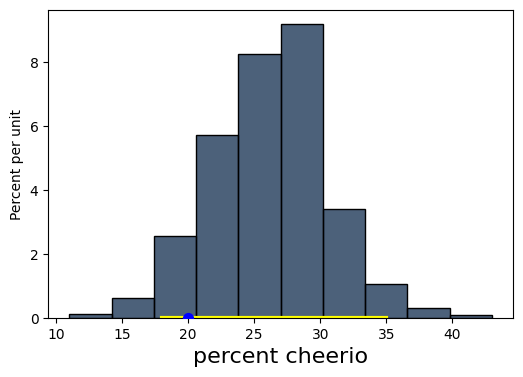

In [47]:
cheerio_table = Table().with_column("percent cheerio", bstrap_cheerios)
cheerio_table.hist("percent cheerio")


plt.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plt.scatter(20, 0, color="blue", s=50, zorder=6);

Looking at the graph we can see that our true parameter which is the true percentage of people who eat Cheerios at Berkeley, is within our 95% confidence interval. We say that we are 95% confident that the process results in a good interval where "good" means the interval contains our true parameter. Our interval of estimates is called a 95% confidence interval for the parameter, and 95% is called the confidence level of the interval. 